In [30]:
import xarray as xr
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from sea_clearly import settings
from sea_clearly.create_masks import get_coastal_nodes

land_mask = xr.load_dataset(os.path.join(settings.DIR_INPUT,settings.NAME_LANDMASK))
coast_mask = get_coastal_nodes(land_mask['mask_land']).astype(bool)

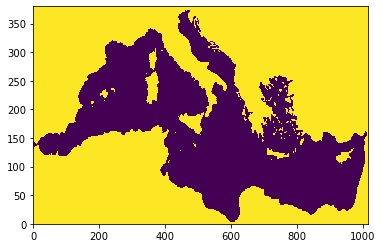

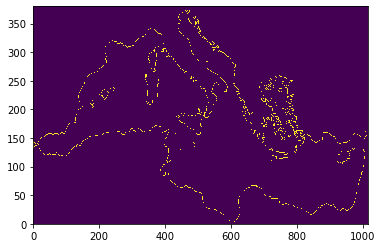

In [31]:
plt.pcolormesh(land_mask['mask_land'])

plt.figure()
plt.pcolormesh(coast_mask)

In [34]:
X,Y = np.meshgrid(land_mask['mask_land']['lon'],land_mask['mask_land']['lat'])
lons_coast = X[coast_mask]
lats_coast = Y[coast_mask]

In [35]:
# for every lon and lat at the coast, we need to check what's the closest country


for i1,(lon_,lat_) in enumerate(zip(lons_coast,lats_coast)):
    pass
    
    
    # put the loop in the cell below here, looping through the different countries
    # countries = reader.records()
    # for country in countries:


In [36]:
from shapely.geometry import Point
all_medit_names = ['Albania', 'Algeria', 'Bosnia and Herzegovina', 'Croatia',
       'Cyprus', 'Egypt', 'France', 'Greece', 'Israel', 'Italy',
       'Lebanon', 'Libya', 'Montenegro', 'Morocco', 'Northern Cyprus',
       'Palestine', 'Slovenia', 'Spain', 'Syria', 'Tunisia', 'Turkey']


shpfilename = shpreader.natural_earth(resolution='50m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    
        geom = country.geometry
        country_name = str(country.attributes['NAME_LONG']).replace('\x00','')

        if country_name in all_medit_names:    
            print(country_name)
            break

Turkey


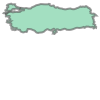

In [40]:
geom

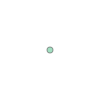

In [41]:
Point(lon_,lat_)

In [39]:
# Here we can calculate the distance of a geom (country) to a point
# we can 1) loop through the coastline points.
# 2) for every Medit. country (see above) check the distance to the point
# 3) save the minimum distance and corresponding country
# 4) save the results in a netcdf. I suggest numbering the countries in the all_medit_names list (i.e. Albania=0, Algeria=1 etc.)
# and making a gridded file where the coastline points have a number corresponding to the list above
# you can use the function in sea_clearly/wrtie_tools to save as netcdf file
# 5) we should also define a lon/lat for each country where we plot the source 'circles'. This could probably also go in the netcdf file. These locations you can pick by hand

geom.distance(Point(lon_,lat_))

13.24158064631438